In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 21. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classifier Accuracy on Iris dataset: {accuracy:.4f}')

KNN Classifier Accuracy on Iris dataset: 1.0000


## 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

In [18]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [20]:
X, y = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
y_pred = knn_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

665.6701451226758

## 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Train with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_euclidean

0.9473684210526315

In [36]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_manhattan

0.9649122807017544

In [38]:
print(f'Accuracy with Euclidean Distance: {accuracy_euclidean:.4f}')
print(f'Accuracy with Manhattan Distance: {accuracy_manhattan:.4f}')

Accuracy with Euclidean Distance: 0.9474
Accuracy with Manhattan Distance: 0.9649


## 24. Train a KNN Classifier with different values of K and visualize decision boundaries.

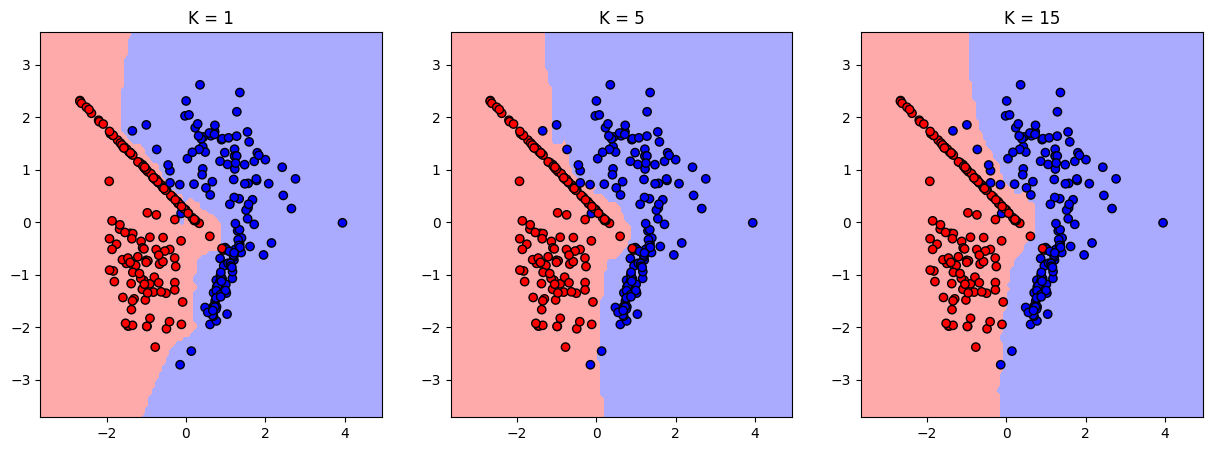

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load a 2D dataset for visualization
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, n_features=2,n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Define different K values
k_values = [1, 5, 15]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, cmap=cmap_light)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    axes[i].set_title(f'K = {k}')

plt.show()


## Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [90]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Train KNN without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
accuracy_unscaled = knn_unscaled.score(X_test, y_test)

In [96]:
# Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Train KNN with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)

In [100]:
print(f'Accuracy without Feature Scaling: {accuracy_unscaled:.4f}')
print(f'Accuracy with Feature Scaling: {accuracy_scaled:.4f}')

Accuracy without Feature Scaling: 0.9561
Accuracy with Feature Scaling: 0.9474


## 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [123]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=10, noise=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)
pca.fit(X, y)

# Print explained variance ratio
print("Explained Variance Ratio for each PCA Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio for each PCA Component:
[0.14473299 0.12402715 0.11575703 0.10995915 0.10389611 0.09623746
 0.08757741 0.08025028 0.07214588 0.06541655]


## 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [146]:
iris = load_breast_cancer()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Train and evaluate KNN without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")

Accuracy without PCA: 0.9561


In [150]:
# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)  # Select enough components to retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [152]:
# Train and evaluate KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")
print(f"Number of PCA components used: {pca.n_components_}")

Accuracy with PCA: 0.9386
Number of PCA components used: 1


## 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6}
Best Accuracy: 0.9407


## 29. Train a KNN Classifier and check the number of misclassified samples.

In [168]:
# Train a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Calculate misclassified samples
misclassified_samples = (y_test != y_pred).sum()
print(f'Number of misclassified samples: {misclassified_samples}')


Number of misclassified samples: 5


## Q30. Train a PCA model and visualize the cumulative explained variance.


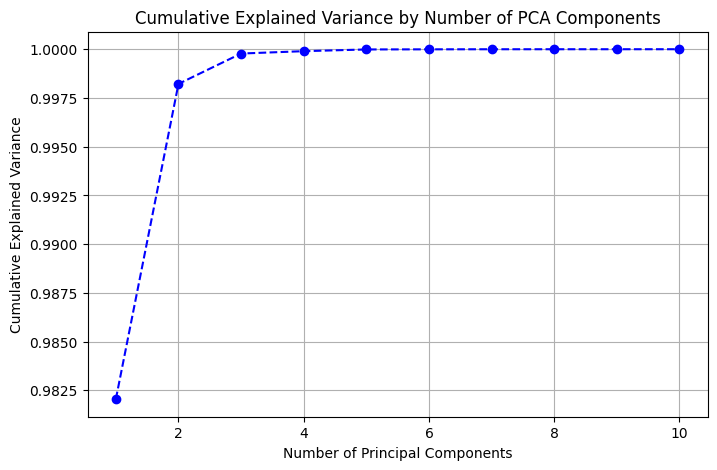

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA(n_components=10)
pca.fit(X)

# Compute cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.grid()
plt.show()


## Q31: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [193]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [197]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
# Train KNN classifier with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)

In [201]:
# Train KNN classifier with distance-based weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

In [203]:
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Print results
print(f'Accuracy with uniform weights: {accuracy_uniform:.4f}')
print(f'Accuracy with distance weights: {accuracy_distance:.4f}')

Accuracy with uniform weights: 0.9561
Accuracy with distance weights: 0.9561


## Q32: Train a KNN Regressor and analyze the effect of different K values on performance.

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [211]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
k_values = range(1, 21)  # K from 1 to 20
mse_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

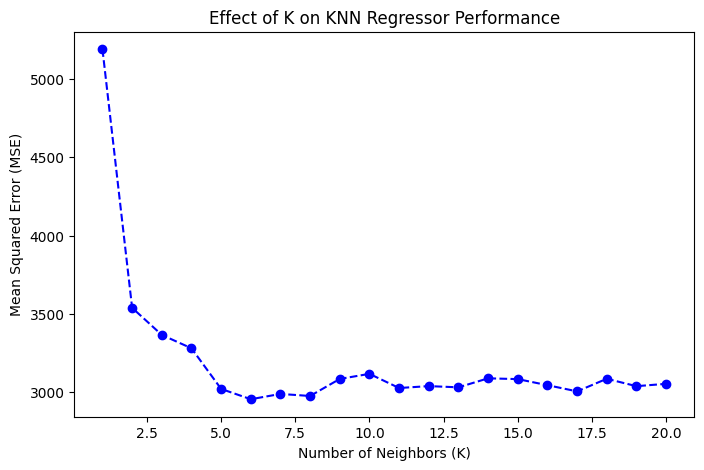

In [215]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of K on KNN Regressor Performance")
plt.show()

## Q33: Implement KNN Imputation for handling missing values in a dataset.

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.impute import KNNImputer

In [220]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [234]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [230]:
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [248]:
# Introduce missing values randomly
np.random.seed(42)
missing_samples = np.random.choice(X.index, size=int(0.1 * X.shape[0]), replace=False)
missing_features = np.random.choice(X.columns, size=3, replace=False)  # Select 3 random features

for feature in missing_features:
    X.loc[missing_samples, feature] = np.nan  # Assign NaN

print("Dataset with Missing Values:\n", X.isnull().sum())

Dataset with Missing Values:
 age    44
sex     0
bmi     0
bp      0
s1      0
s2      0
s3      0
s4     44
s5     44
s6      0
dtype: int64


In [250]:
# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [252]:
# Display dataset after imputation
print("\nDataset after KNN Imputation:\n", X_imputed.isnull().sum())


Dataset after KNN Imputation:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


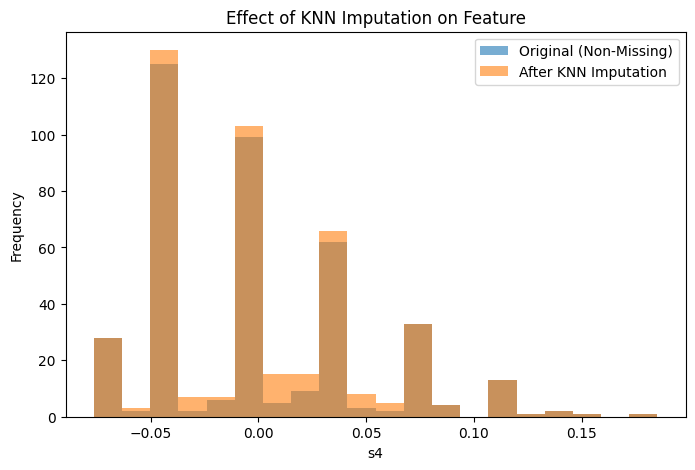

In [254]:
# Visualizing Imputation for One Feature
feature_to_plot = missing_features[0]  # Pick one of the missing features
plt.figure(figsize=(8, 5))
plt.hist(X[feature_to_plot].dropna(), bins=20, alpha=0.6, label="Original (Non-Missing)")
plt.hist(X_imputed[feature_to_plot], bins=20, alpha=0.6, label="After KNN Imputation")
plt.xlabel(feature_to_plot)
plt.ylabel("Frequency")
plt.title("Effect of KNN Imputation on Feature")
plt.legend()
plt.show()

## Q34: Train a PCA model and visualize the data projection onto the first two principal components.

In [291]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [293]:
# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

In [295]:
# Train a PCA model to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

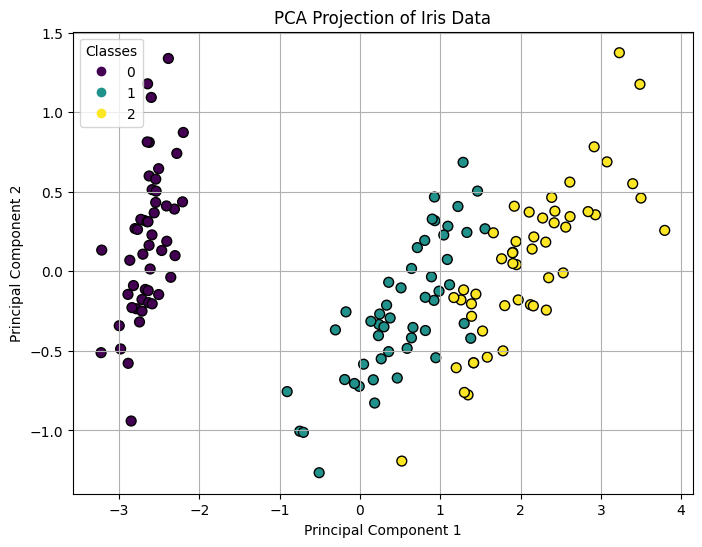

In [297]:
# Visualize the data projection onto the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Iris Data')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

## Q35: Train a KNN Classifier using KD Tree and Ball Tree algorithms and compare performance.

In [300]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [304]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [306]:
# Function to train and evaluate KNN
def evaluate_knn(algorithm):
    start_time = time.time()
    
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    knn.fit(X_train, y_train)
    
    train_time = time.time() - start_time  # Training time
    
    start_time = time.time()
    y_pred = knn.predict(X_test)
    predict_time = time.time() - start_time  # Prediction time
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, train_time, predict_time

In [308]:
# Train and evaluate KNN with KD-Tree
kd_accuracy, kd_train_time, kd_predict_time = evaluate_knn("kd_tree")

# Train and evaluate KNN with Ball-Tree
ball_accuracy, ball_train_time, ball_predict_time = evaluate_knn("ball_tree")

# Print results
print(f"KD-Tree Accuracy: {kd_accuracy:.4f}, Train Time: {kd_train_time:.6f}s, Predict Time: {kd_predict_time:.6f}s")
print(f"Ball-Tree Accuracy: {ball_accuracy:.4f}, Train Time: {ball_train_time:.6f}s, Predict Time: {ball_predict_time:.6f}s")

KD-Tree Accuracy: 1.0000, Train Time: 0.024116s, Predict Time: 0.021732s
Ball-Tree Accuracy: 1.0000, Train Time: 0.009649s, Predict Time: 0.020473s


## Q36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [313]:
# Load high-dimensional dataset (Digits dataset: 64 features)
digits = load_digits()
X, y = digits.data, digits.target

In [330]:
X.shape, X.shape[1]

((1797, 64), 64)

In [315]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [317]:
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

In [319]:
explained_variance = pca.explained_variance_ratio_

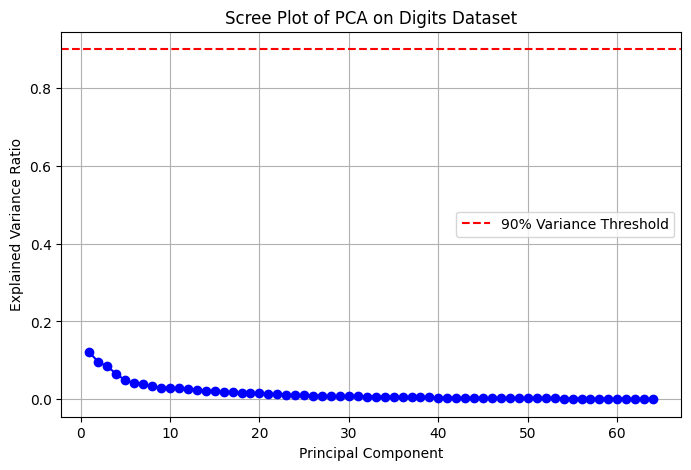

Number of components needed to explain 90% variance: 31


In [321]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA on Digits Dataset")
plt.grid(True)

# Show cumulative variance
cumulative_variance = np.cumsum(explained_variance)
plt.axhline(y=0.90, color='r', linestyle='dashed', label="90% Variance Threshold")
plt.legend()
plt.show()

# Print number of components needed to reach 90% variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components needed to explain 90% variance: {num_components}")

## Q37: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [332]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [334]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [336]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [338]:
y_pred = knn.predict(X_test)

In [340]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Q38: Train a PCA model and analyze the effect of different numbers of components on accuracy.

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [345]:
digits = load_digits()
X, y = digits.data, digits.target

In [347]:
# Standardize the data (PCA is affected by scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [353]:
X.shape, X.shape[1]

((1797, 64), 64)

In [366]:
components_range = range(1, X.shape[1] + 1)
accuracy_scores = []

for n in components_range :
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN classifier on transformed data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca,y_train)

     # Evaluate accuracy
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

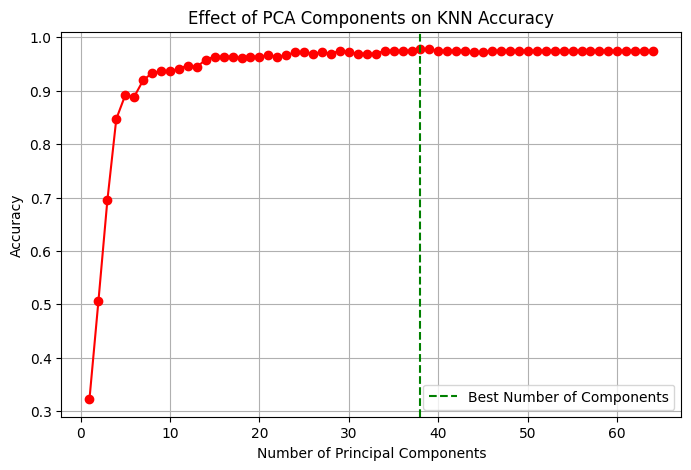

Optimal number of components: 38 (Accuracy: 0.9778)


In [380]:
# Plot Accuracy vs. Number of Components
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracy_scores, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of PCA Components on KNN Accuracy")
plt.axvline(x=np.argmax(accuracy_scores) + 1, color='g', linestyle='dashed', label="Best Number of Components")
plt.legend()
plt.grid(True)
plt.show()

# Print best number of components
best_n = np.argmax(accuracy_scores) + 1
print(f"Optimal number of components: {best_n} (Accuracy: {max(accuracy_scores):.4f})")

## Q39: Train a KNN Classifier with different leaf_size values and compare accuracy.

In [406]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [408]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
# Test different leaf_size values
leaf_sizes = [1, 5, 10, 20, 30, 50]
accuracies = []
train_times = []

for leaf_size in leaf_sizes:
    start_time = time.time()
    
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    
    train_time = time.time() - start_time  # Training time
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    train_times.append(train_time)

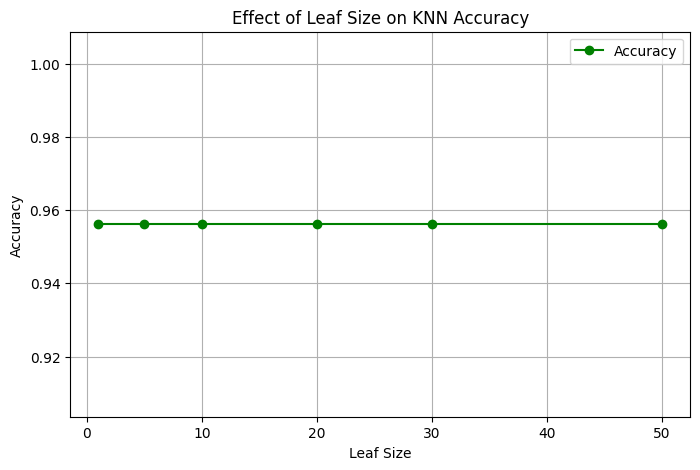

Leaf Size: 1, Accuracy: 0.9561, Train Time: 0.07630s
Leaf Size: 5, Accuracy: 0.9561, Train Time: 0.04679s
Leaf Size: 10, Accuracy: 0.9561, Train Time: 0.00642s
Leaf Size: 20, Accuracy: 0.9561, Train Time: 0.00805s
Leaf Size: 30, Accuracy: 0.9561, Train Time: 0.00707s
Leaf Size: 50, Accuracy: 0.9561, Train Time: 0.00939s


In [410]:
# Plot Accuracy vs. Leaf Size
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='-', color='green', label="Accuracy")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Print results
for i, leaf in enumerate(leaf_sizes):
    print(f"Leaf Size: {leaf}, Accuracy: {accuracies[i]:.4f}, Train Time: {train_times[i]:.5f}s")

## Q40: Train a PCA model and visualize how data points are transformed before and after PCA.

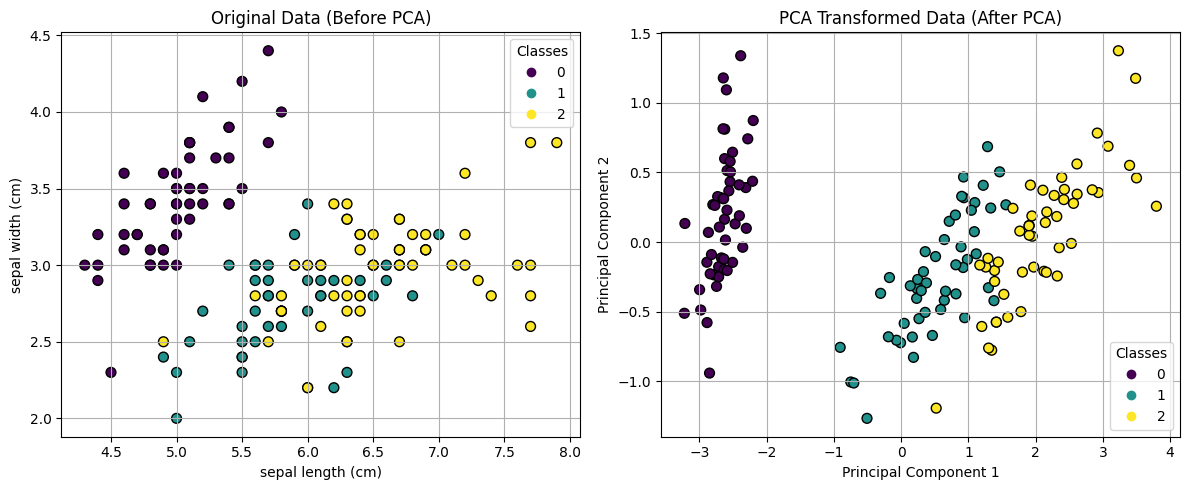

In [442]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Class labels
feature_names = data.feature_names

# Select first two features (for visualization before PCA)
X_original = X[:, :2]  # Sepal Length & Sepal Width

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Original Data (Before PCA)
scatter1 = axes[0].scatter(X_original[:, 0], X_original[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axes[0].set_xlabel(feature_names[0])  # Sepal Length
axes[0].set_ylabel(feature_names[1])  # Sepal Width
axes[0].set_title("Original Data (Before PCA)")
axes[0].legend(*scatter1.legend_elements(), title="Classes")
axes[0].grid(True)

# Plot PCA Transformed Data
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("PCA Transformed Data (After PCA)")
axes[1].legend(*scatter2.legend_elements(), title="Classes")
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## Q41: Train a KNN Classifier on a real-world dataset (Wine dataset) and print the classification report.

In [445]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [447]:
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

In [449]:
# Standardize the data (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [453]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## Q42: Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

In [456]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [458]:
data = fetch_california_housing()
X, y = data.data, data.target

In [460]:
# Standardize features (KNN is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [464]:
# Define different distance metrics to test
metrics = ['euclidean', 'manhattan', 'minkowski']
errors = []

for metric in metrics:
    # Train KNN Regressor
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_reg.predict(X_test)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
    print(f"Metric: {metric}, MSE: {mse:.4f}")

Metric: euclidean, MSE: 0.4338
Metric: manhattan, MSE: 0.3848
Metric: minkowski, MSE: 0.4338


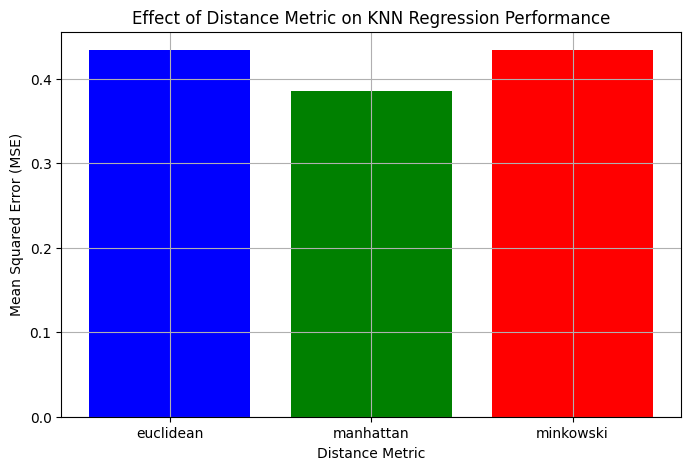

In [466]:
# Plot Distance Metric vs. MSE
plt.figure(figsize=(8, 5))
plt.bar(metrics, errors, color=['blue', 'green', 'red'])
plt.xlabel("Distance Metric")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Distance Metric on KNN Regression Performance")
plt.grid(True)
plt.show()

## Q43: Train a KNN Classifier and evaluate using ROC-AUC score.

In [510]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Load the dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Target (multiclass)

# For ROC-AUC, we need binary classification, so we'll modify the problem
# Let's make it a binary classification: class 0 vs. rest
y_binary = (y > 0).astype(int)  # Class 0 = 0, Class 1 or 2 = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as default
knn.fit(X_train, y_train)

# Predict probabilities for ROC-AUC (KNN provides probabilities via predict_proba)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Predict class labels and check accuracy
y_pred = knn.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

ROC-AUC Score: 1.0000
Accuracy: 1.0000


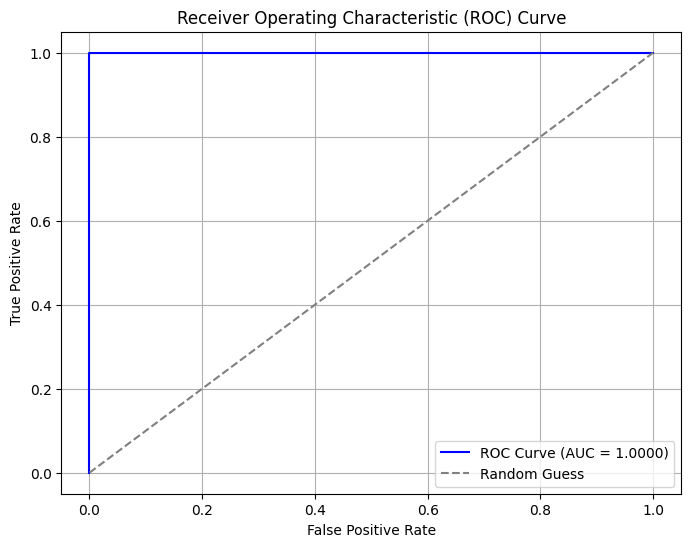

In [514]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Q44: Train a PCA model and visualize the variance captured by each principal component.

In [519]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset (Wine dataset: 13 features)
wine = load_wine()
X, y = wine.data, wine.target

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (fraction of total variance captured)
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)


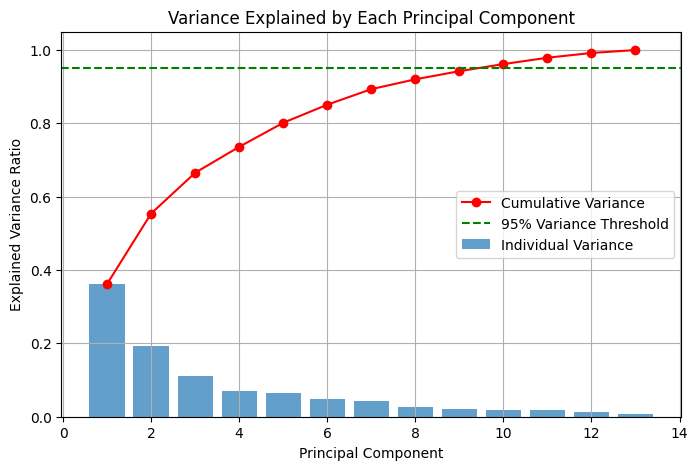

Number of components needed to retain 95% variance: 10


In [521]:
# Plot Scree Plot (Variance vs. Number of Components)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label="Individual Variance")
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', color='r', label="Cumulative Variance")
plt.axhline(y=0.95, color='g', linestyle='dashed', label="95% Variance Threshold")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Each Principal Component")
plt.legend()
plt.grid(True)
plt.show()

# Print number of components needed for 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to retain 95% variance: {num_components_95}")

## Q45: Train a KNN Classifier and perform feature selection before training.

In [524]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

In [526]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Standardize features (KNN is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [528]:
# Feature Selection: Select Top K Features (ANOVA F-test)
k = 10  # Number of best features to keep
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]

In [530]:
selected_features

['mean radius',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concavity',
 'worst concave points']

In [532]:
# Train KNN Classifier (Without Feature Selection)
knn_all = KNeighborsClassifier(n_neighbors=5)
knn_all.fit(X_train, y_train)
y_pred_all = knn_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Train KNN Classifier (With Feature Selection)
knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_selected, y_train)
y_pred_selected = knn_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# Print Results
print(f"Accuracy without Feature Selection: {accuracy_all:.4f}")
print(f"Accuracy with Feature Selection ({k} features): {accuracy_selected:.4f}")
print(f"Selected Features: {selected_features}")

Accuracy without Feature Selection: 0.9474
Accuracy with Feature Selection (10 features): 0.9737
Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


## Q46: Train a PCA model and visualize the data reconstruction error after reducing dimensions.

In [535]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset (Digits: 64 features)
digits = load_digits()
X = digits.data

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range of principal components to test
components = range(1, 65)
errors = []

# Compute reconstruction error for each number of components
for n in components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Compute reconstruction error (MSE)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    errors.append(mse)

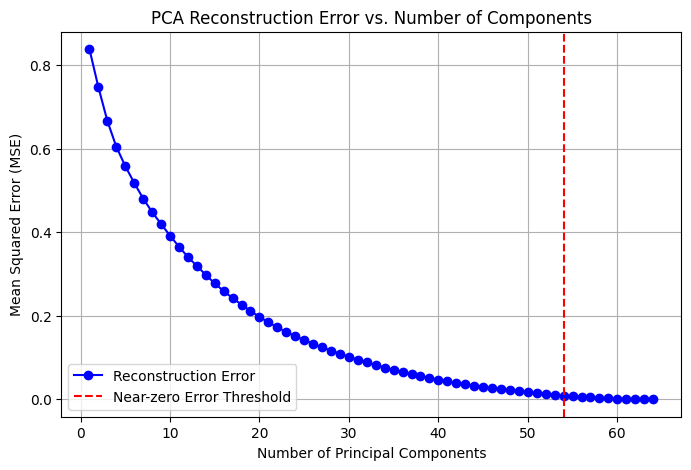

Optimal number of components for minimal error: 54


In [537]:
# Plot Reconstruction Error vs. Number of Components
plt.figure(figsize=(8, 5))
plt.plot(components, errors, marker='o', color='b', label="Reconstruction Error")
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("PCA Reconstruction Error vs. Number of Components")
plt.axvline(x=np.argmax(np.array(errors) < 0.01) + 1, color='r', linestyle='dashed', label="Near-zero Error Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Find optimal number of components
optimal_components = np.argmax(np.array(errors) < 0.01) + 1
print(f"Optimal number of components for minimal error: {optimal_components}")

## Q47: Train a KNN Classifier and visualize the decision boundary.

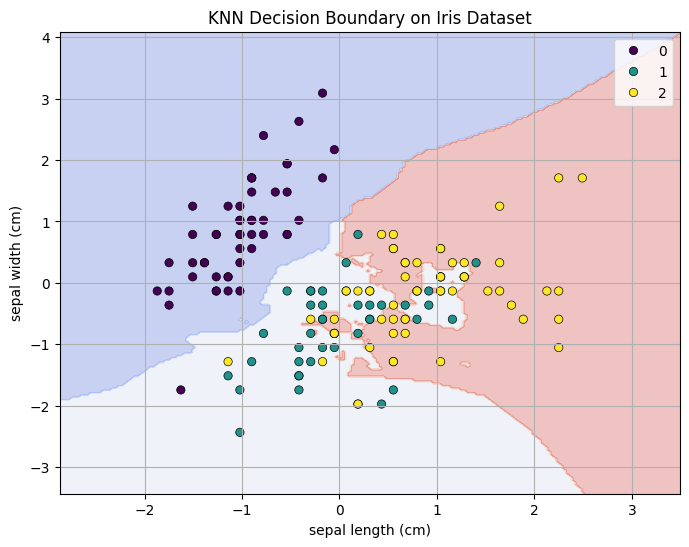

In [564]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only first two features for visualization
y = iris.target

# Standardizing features (KNN is sensitive to scale)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of training data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", edgecolor='k')

# Labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary on Iris Dataset")
plt.grid(True)
plt.show()


## Q48: Train a PCA model and analyze the effect of different numbers of components on data variance.

In [558]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset (Wine dataset with 13 features)
wine = load_wine()
X = wine.data

# Standardize the data (PCA is scale-sensitive)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (how much variance each component captures)
explained_variance = pca.explained_variance_ratio_

# Cumulative variance (total variance retained as we add more components)
cumulative_variance = np.cumsum(explained_variance)




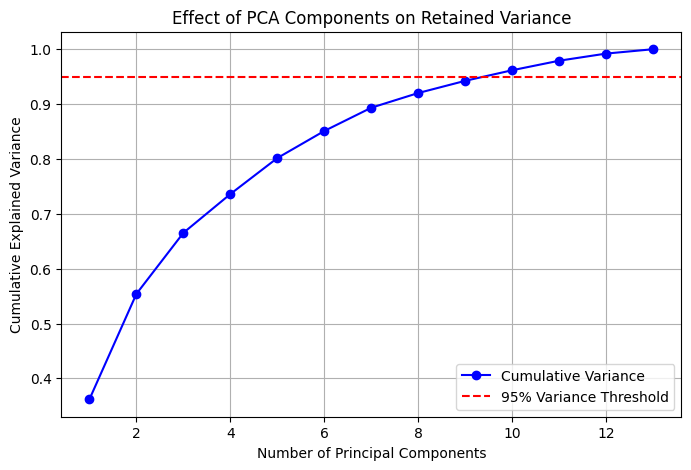

Number of components needed to retain 95% variance: 10


In [560]:
# Plot cumulative variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b', label="Cumulative Variance")
plt.axhline(y=0.95, color='r', linestyle='dashed', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Effect of PCA Components on Retained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Find the minimum number of components that retain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to retain 95% variance: {optimal_components}")